In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
feature_vector_length =784
num_classes=10

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
input_shape = (feature_vector_length) 
print(f'Feature shape: {input_shape}') 


Feature shape: 784


In [5]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length) 
X_test = X_test.reshape(X_test.shape[0], feature_vector_length) 

In [6]:
X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255 
Y_train = to_categorical(Y_train, num_classes) 
Y_test = to_categorical(Y_test, num_classes) 


In [7]:
input_shape=(28*28,)
model = Sequential() 
model.add(Dense(350, input_shape=input_shape, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(num_classes, activation='softmax')) 


In [8]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 5s 17ms/step - loss: 0.3739 - accuracy: 0.8950 - val_loss: 0.1801 - val_accuracy: 0.9480
Epoch 2/10
192/192 [==============================] - 3s 14ms/step - loss: 0.1492 - accuracy: 0.9562 - val_loss: 0.1261 - val_accuracy: 0.9635
Epoch 3/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0980 - accuracy: 0.9714 - val_loss: 0.1129 - val_accuracy: 0.9676
Epoch 4/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0711 - accuracy: 0.9795 - val_loss: 0.0962 - val_accuracy: 0.9709
Epoch 5/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0543 - accuracy: 0.9844 - val_loss: 0.0914 - val_accuracy: 0.9725
Epoch 6/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0402 - accuracy: 0.9888 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 7/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0301 - accuracy: 0.9920 - val_loss: 0.0871 - val_accuracy: 0.9750

In [9]:
test_results = model.evaluate(X_test, Y_test, verbose=1) 
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}') 


313/313 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9788
Test results - Loss: 0.0698188990354538 - Accuracy: 0.9787999987602234


In [10]:
predictions = model.predict(X_test[:5]) 
predicted_classes = np.argmax(predictions, axis=1) 
true_classes = np.argmax(Y_test[:5], axis=1) 


1/1 [==============================] - 0s 145ms/step


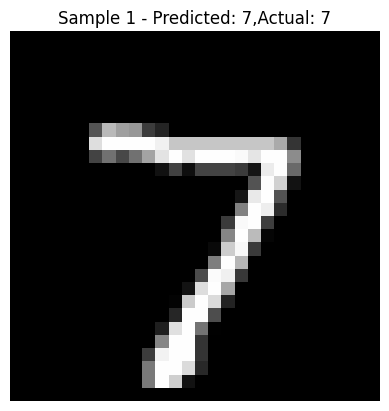

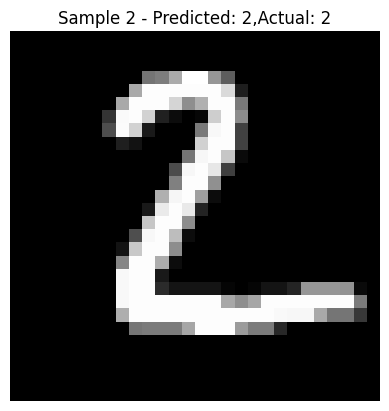

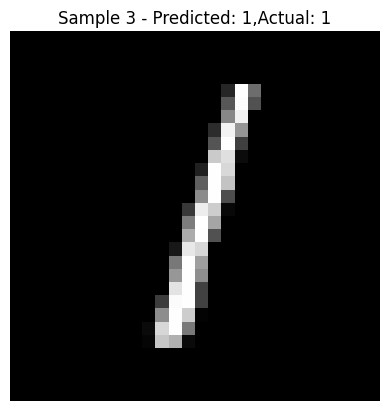

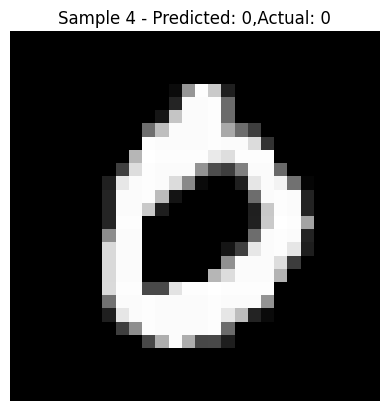

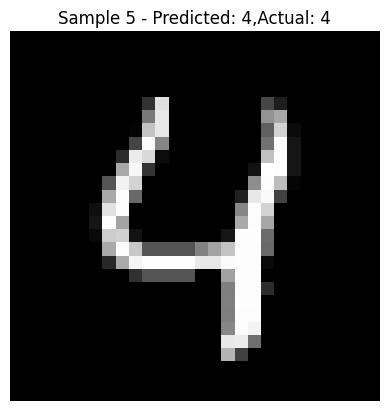

In [14]:
for i in range(5): 
     plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
     plt.title(
         f"Sample {i+1} - Predicted: {predicted_classes[i]},"
         f"Actual: {true_classes[i]}"
     ) 
     plt.axis('off') 
     plt.show()
